**ogs-jupyter-lab: phase-field benchmarks: AT1**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-jupyter-lab.png" alt="drawing" width="200"/>

**Description**

...

**Inspector**

In [16]:
import pyvista as pv
#filename = "bar.vtu"
filename = "/home/ok/ogs-jupyter-lab-dev/VPF/AT1_iso_tension_ts_9_t_0_900000_0.vtu"
mesh = pv.read(filename)
print("inspecting vtu-file: " + str(filename))
mesh

inspecting vtu-file: /home/ok/ogs-jupyter-lab-dev/VPF/AT1_iso_tension_ts_9_t_0_900000_0.vtu


UnstructuredGrid (0x7f683f684160)
  N Cells:	2500
  N Points:	3636
  X Bounds:	0.000e+00, 1.000e+00
  Y Bounds:	0.000e+00, 5.000e-02
  Z Bounds:	0.000e+00, 5.000e-02
  N Arrays:	7

In [48]:
from ogs6py import ogs
project_file = "AT1_iso_tensile.prj"
print("inspecting xml-tree: " + str(project_file))
model = ogs.OGS(INPUT_FILE=project_file,PROJECT_FILE=project_file)
#print("PROCESS: ")
#model.tree.find("./processes/process/type").text
print("PARAMETERS: ")
[i.text for i in model.tree.findall("./parameters/parameter/name")]
#print("PROCESS: ")
#[i.text for i in model.tree.findall("./processvars/parameter/name")]
#[i.text for i in model.tree.findall("./nonlinsolvers/parameter/name")]
#[i.text for i in model.tree.findall("./linsolvers/parameter/name")]
#[i.text for i in model.tree.findall("./parameters/parameter/name")]

inspecting xml-tree: AT1_iso_tensile.prj
PARAMETERS: 


['E',
 'nu',
 'k',
 'gc',
 'ls',
 'rho_sr',
 'displacement0',
 'phasefield_ic',
 'phasefield_bc',
 'dirichlet0',
 'Dirichlet_spatial',
 'dirichlet_right_time',
 'dirichlet_right']

**Running ogs (mode)**

In [19]:
import multiprocessing
from ogs6py import ogs
print("===============")
print(">>> run ogs <<<")

PATH_OGS = "/home/ok/ogs/build/release/bin/"
PATH_SINGULARITY = "/usr/bin/"
PATH_CONTAINER = "/home/ok/ogs/container/gcc-10-openmpi-4.0.5-system-cmake-f0a156cb-4a3437aac8bc.sif"
PROJECT_FILE = "AT1_iso_tensile.prj"

model = ogs.OGS(INPUT_FILE=project_file,PROJECT_FILE=project_file)

i=3
###
#1 run ogs executeable
if i==1:
    print("run ogs executeable")
    model.run_model(path=PATH_OGS,logfile="console.log")
#model.run_model(args="-o ./full_coupling")

###
#2 run ogs container
if i==2:
    print("run ogs container")
    model.run_model(path=PATH_SINGULARITY,container_path=PATH_CONTAINER,logfile="console.log")

###
#3
if i==3:
    print("run ogs container: multiprocessing")
    ogs_process = multiprocessing.Process(
        target=model.run_model,
        kwargs={"path":PATH_SINGULARITY, "container_path":PATH_CONTAINER,"logfile":"example.log"})
    ogs_process.start()
###
#4 run jupyter container
if i==4:
    print("run jupyter container")
    #!ogs PROJECT_FILE

>>> run ogs <<<
run ogs container: multiprocessing
OGS finished with project file AT1_iso_tensile.prj.
Execution took 26.811366081237793 s


**Analysing results**

In [24]:
print("Calling Paraview")
PARAVIEW_FILE = "AT1.pvsm"
#! paraview PARAVIEW_FILE
! paraview AT1.pvsm

Calling Paraview
qt5ct: using qt5ct plugin
qt5ct: D-Bus global menu: no


**Inspecting VTU Files**

In [29]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt

filename = "/home/ok/ogs-jupyter-lab-dev/VPF/AT1_iso_tension_ts_9_t_0_900000_0.vtu"
print(filename)
vtufile = vtuIO.VTUIO(filename)
point_fields = vtufile.get_point_field_names()
print("point_fields:")
print(point_fields)
point_field = vtufile.get_point_field(variable_name)
print("point_field:")
print(point_field)

/home/ok/ogs-jupyter-lab-dev/VPF/AT1_iso_tension_ts_9_t_0_900000_0.vtu
point_fields:
['NodalForces', 'displacement', 'epsilon', 'phasefield', 'sigma']
point_field:
[[ 0.          0.16806779 -0.04286695]
 [ 0.          0.15431751 -0.01249195]
 [ 0.          0.13769279 -0.05661724]
 ...
 [ 3.9285      0.13276756 -0.02956718]
 [ 3.969       0.13276756 -0.02956718]
 [ 4.0095      0.13276756 -0.02956718]]


Profile plot
[0.2, 0.5, 1.0]


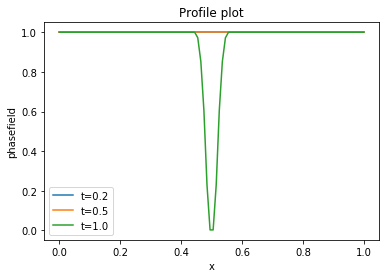

In [47]:
theme = "Profile plot"
print(theme)
import numpy as np
import matplotlib.pyplot as plt
import vtuIO

xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=1.0, num=100)]
r_x = np.array(xaxis)[:,0]
pvdfile=vtuIO.PVDIO("AT1_iso_tension.pvd", dim=3)
#time = pvdfile.timesteps
time = [0.2,0.5,1.0]
print(time)
variable = "phasefield"
for t in time:
    pressure_xaxis_t2 = pvdfile.read_set_data(t, variable, data_type="point", pointsetarray=xaxis)
    plt.plot(r_x, pressure_xaxis_t2, label="t="+str(t))
plt.legend()
plt.title(theme)
plt.xlabel('x')
plt.ylabel(variable)
plt.show()

Temporal plot


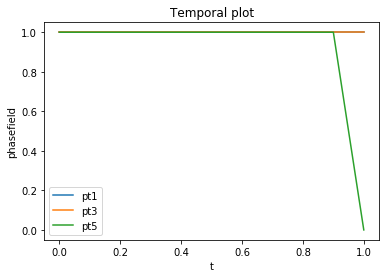

In [46]:
theme = "Temporal plot"
print(theme)
timesteps = pvdfile.timesteps
selected_points = {}
for i in range(10):
    selected_points[f"pt{i}"] = (i/10, 0.0, 0.0)
#selected_points[f"pt0"] = (0.5, 0.0, 0.0)
pressure_interpolation=pvdfile.read_time_series('phasefield', selected_points)    
pressure_pt1=pressure_interpolation['pt1']
pressure_pt3=pressure_interpolation['pt3']
pressure_pt5=pressure_interpolation['pt5']
plt.plot(timesteps, pressure_pt1, label='pt1')
plt.plot(timesteps, pressure_pt3, label='pt3')
plt.plot(timesteps, pressure_pt5, label='pt5')
plt.legend()
plt.title(theme)
plt.xlabel('t')
plt.ylabel(variable)
plt.show()

**Vertical cross-sections**

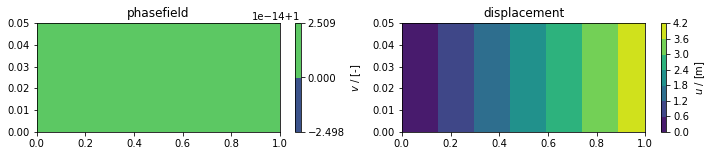

In [45]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

m_plot=vtuIO.VTUIO("AT1_iso_tension_ts_9_t_0_900000_0.vtu", dim=3)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
var_left = "phasefield"
var_right = "displacement"
u_plot = m_plot.get_point_field(var_left)
p_plot = m_plot.get_point_field(var_right).T[0]
fig, ax = plt.subplots(ncols=2, figsize=(12,2))
contour_left = ax[0].tricontourf(triang, u_plot)
contour_right = ax[1].tricontourf(triang, p_plot)
fig.colorbar(contour_left,ax=ax[0],label='$v$ / [-]')
fig.colorbar(contour_right,ax=ax[1],label='$u$ / [m]')
ax[0].set_title(var_left)
ax[1].set_title(var_right)
plt.show()

In [43]:
import time
print(time.ctime())

Thu Nov 18 02:00:10 2021


**OGS links**
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/PhaseField/beam/AT1_iso_tensile.prj
- jupyter template by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)

**Credits**
- Keita for this benchmark set up
- Jörg Buchwald for [ogs6py](https://github.com/joergbuchwald/ogs6py) and [VTUInterface](https://github.com/joergbuchwald/VTUinterface)